In [110]:
# imports
import numpy as np
import pandas as pd
from dispersion_stats import *
from scipy.stats import variation, iqr
import os
import seaborn as sns




In [111]:
# read all data from processes Data folder in for loop

folder_path = 'ProcessesData'  # replace with your folder path
df_final = pd.DataFrame({"Name": [], "CV":[], "CD":[], "CMD":[], "CIQR90":[], "GC":[], "OoOS":[], "OoIQR":[], "CR":[], "Time":[]})

# iterate over all data(processes) in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path, sep=';', names=["time"])
    df.time = pd.to_timedelta(df['time']).dt.total_seconds()
    array = df.time.to_numpy()

    # calculate coeficients
    variation_coef = round(variation(array, ddof=0), 2)
    dispersion_coef = round(coefficient_of_dispersion(array), 2)
    mean_deviation_coef = round(coefficient_of_mean_deviation(array), 2)
    inner_quantile_range_coef = round(coefficient_of_inner_quantile_range_ninety(array), 2)
    gini_coef = round(gini(array), 2)
    outliers_out_of_one_sigma = round(outlier_one_sigma(array), 2)
    outliers_out_of_iqr = round(outlier_whiskers(array)/len(array),2)
    range_coef = round(coefficient_of_range(array), 2)
    time_average = round((array.mean()))

    # append coeficients to the final dataframe
    df_final = df_final.append({"Name": filename[:-4] ,"CV": variation_coef, "CD": dispersion_coef, "CMD": mean_deviation_coef, "CIQR90": inner_quantile_range_coef, "GC": gini_coef, "OoOS": outliers_out_of_one_sigma, "OoIQR": outliers_out_of_iqr, "CR": range_coef, "Time": time_average}, ignore_index=True)



        # Now you can do something with the data


C:\Users\PhD_Pointee_Dev\AppData\Local\Temp\ipykernel_48864\1630428745.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({"Name": filename[:-4] ,"CV": variation_coef, "CD": dispersion_coef, "CMD": mean_deviation_coef, "CIQR90": inner_quantile_range_coef, "GC": gini_coef, "OoOS": outliers_out_of_one_sigma, "OoIQR": outliers_out_of_iqr, "CR": range_coef, "Time": time_average}, ignore_index=True)
C:\Users\PhD_Pointee_Dev\AppData\Local\Temp\ipykernel_48864\1630428745.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({"Name": filename[:-4] ,"CV": variation_coef, "CD": dispersion_coef, "CMD": mean_deviation_coef, "CIQR90": inner_quantile_range_coef, "GC": gini_coef, "OoOS": outliers_out_of_one_sigma, "OoIQR": outliers_out_of_iqr, "CR": range_coef, "Time": ti

In [112]:
df_final

,Name,CV,CD,CMD,CIQR90,GC,OoOS,OoIQR,CR,Time
0,EFP,0.25,0.18,0.17,0.32,0.13,0.18,0.08,0.81,28.0
1,MP,1.01,1.72,0.87,0.92,0.53,0.24,0.00,0.99,114.0
2,P1,0.23,0.11,0.12,0.16,0.09,0.10,0.08,0.99,158.0
3,P2,0.34,0.22,0.26,0.38,0.17,0.11,0.05,1.00,179.0
4,P3,0.51,0.33,0.36,0.54,0.21,0.18,0.28,0.86,249.0
5,P4,0.69,0.63,0.51,0.65,0.31,0.13,0.07,0.78,399.0
6,P5,1.06,0.33,0.34,0.81,0.28,0.02,0.25,1.00,283.0
7,P6,0.35,0.21,0.21,0.66,0.16,0.16,0.18,0.95,494.0
8,P7,1.07,0.56,0.50,0.67,0.33,0.07,0.10,0.89,91.0
9,P8,0.29,0.25,0.24,0.35,0.16,0.33,0.00,0.81,31.0


In [113]:
# adding Success Rate to the final dataframe
sr = pd.read_csv('SR.csv')
sr
df_final["SR"] = sr 
df_final

,Name,CV,CD,CMD,CIQR90,GC,OoOS,OoIQR,CR,Time,SR
0,EFP,0.25,0.18,0.17,0.32,0.13,0.18,0.08,0.81,28.0,1.00
1,MP,1.01,1.72,0.87,0.92,0.53,0.24,0.00,0.99,114.0,0.05
2,P1,0.23,0.11,0.12,0.16,0.09,0.10,0.08,0.99,158.0,0.96
3,P2,0.34,0.22,0.26,0.38,0.17,0.11,0.05,1.00,179.0,0.93
4,P3,0.51,0.33,0.36,0.54,0.21,0.18,0.28,0.86,249.0,0.91
5,P4,0.69,0.63,0.51,0.65,0.31,0.13,0.07,0.78,399.0,0.19
6,P5,1.06,0.33,0.34,0.81,0.28,0.02,0.25,1.00,283.0,0.69
7,P6,0.35,0.21,0.21,0.66,0.16,0.16,0.18,0.95,494.0,0.82
8,P7,1.07,0.56,0.50,0.67,0.33,0.07,0.10,0.89,91.0,0.57
9,P8,0.29,0.25,0.24,0.35,0.16,0.33,0.00,0.81,31.0,0.94


In [114]:
# reorder columns in df_final
cols = df_final.columns.tolist()
cols = cols[0:1] + cols[-1:] + cols[1:-1]
df_final = df_final[cols]
df_final


,Name,SR,CV,CD,CMD,CIQR90,GC,OoOS,OoIQR,CR,Time
0,EFP,1.00,0.25,0.18,0.17,0.32,0.13,0.18,0.08,0.81,28.0
1,MP,0.05,1.01,1.72,0.87,0.92,0.53,0.24,0.00,0.99,114.0
2,P1,0.96,0.23,0.11,0.12,0.16,0.09,0.10,0.08,0.99,158.0
3,P2,0.93,0.34,0.22,0.26,0.38,0.17,0.11,0.05,1.00,179.0
4,P3,0.91,0.51,0.33,0.36,0.54,0.21,0.18,0.28,0.86,249.0
5,P4,0.19,0.69,0.63,0.51,0.65,0.31,0.13,0.07,0.78,399.0
6,P5,0.69,1.06,0.33,0.34,0.81,0.28,0.02,0.25,1.00,283.0
7,P6,0.82,0.35,0.21,0.21,0.66,0.16,0.16,0.18,0.95,494.0
8,P7,0.57,1.07,0.56,0.50,0.67,0.33,0.07,0.10,0.89,91.0
9,P8,0.94,0.29,0.25,0.24,0.35,0.16,0.33,0.00,0.81,31.0


              SR        CV        CD       CMD    CIQR90        GC      OoOS  \
SR      1.000000 -0.752997 -0.885502 -0.916339 -0.564175 -0.906622 -0.159989   
CV     -0.752997  1.000000  0.683247  0.815351  0.651482  0.877079 -0.073859   
CD     -0.885502  0.683247  1.000000  0.954531  0.521188  0.930031  0.364741   
CMD    -0.916339  0.815351  0.954531  1.000000  0.584776  0.986772  0.321585   
CIQR90 -0.564175  0.651482  0.521188  0.584776  1.000000  0.599078 -0.009643   
GC     -0.906622  0.877079  0.930031  0.986772  0.599078  1.000000  0.277474   
OoOS   -0.159989 -0.073859  0.364741  0.321585 -0.009643  0.277474  1.000000   
OoIQR   0.212922  0.188383 -0.290943 -0.143385  0.409202 -0.095879 -0.329180   
CR      0.060301  0.111040  0.080166 -0.020082  0.239577  0.018700 -0.440638   
Time   -0.305444  0.217825  0.033404  0.155257  0.307760  0.193546 -0.089167   

           OoIQR        CR      Time  
SR      0.212922  0.060301 -0.305444  
CV      0.188383  0.111040  0.217825  
CD

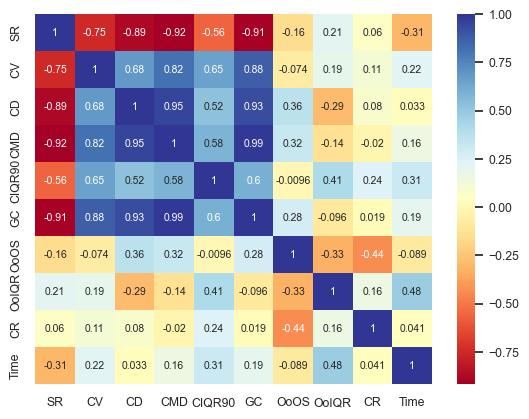

In [115]:
# making correlation matrix and heatmap

corr_matrix = df_final.corr()
print(corr_matrix)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = False

# Draw the heatmap with the mask
sns.color_palette("vlag", as_cmap=True)
sns.set(font_scale=0.8)
graph = sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 7.5}, cmap='RdYlBu')